In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [2]:
# importing the dataset
data=pd.read_csv(r"C:\Users\chman\OneDrive\Desktop\TrafficVolumeProject\IBM\traffic volume.csv")

In [3]:
# displaying first 5 columns of the data
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [4]:
# used to understand the descriptive analysis of the data
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [5]:
# used to display the basic information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [6]:
# used to display the null values of the data
data.isnull().sum()
data['holiday'] = data['holiday'].fillna('None')

data['temp'] = data['temp'].fillna(data['temp'].mean())
data['rain'] = data['rain'].fillna(data['rain'].mean())
data['snow'] = data['snow'].fillna(data['snow'].mean())
data['weather'] = data['weather'].fillna('Clouds')

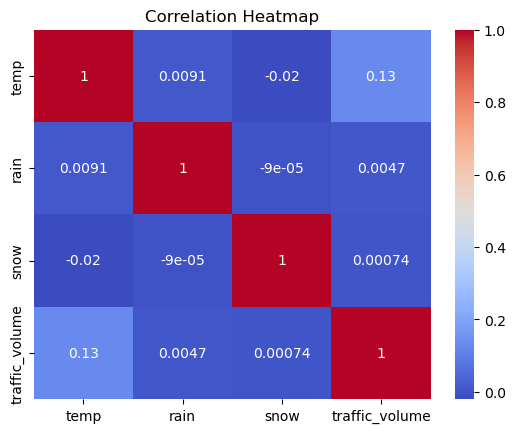

In [7]:
# visualization
import matplotlib.pyplot as plt
numeric_data = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

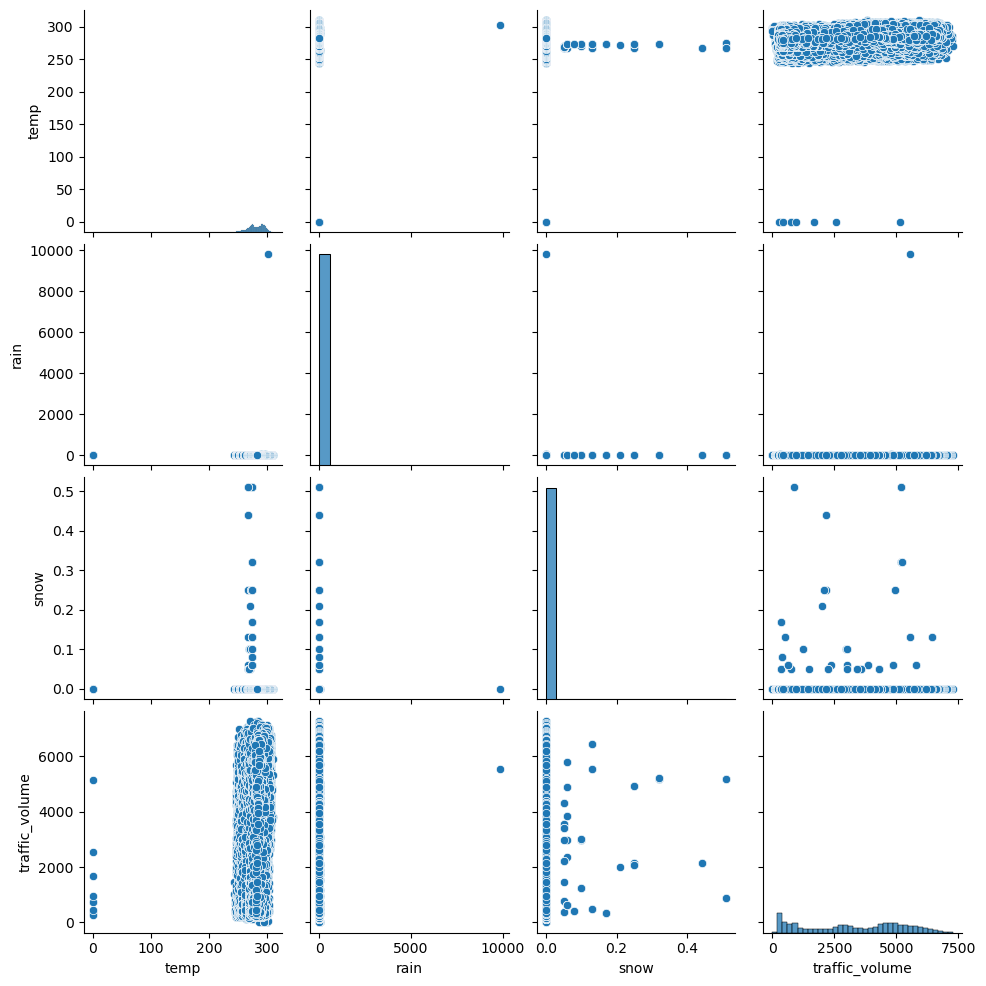

In [8]:
# visualization
sns.pairplot(data)

<Axes: >

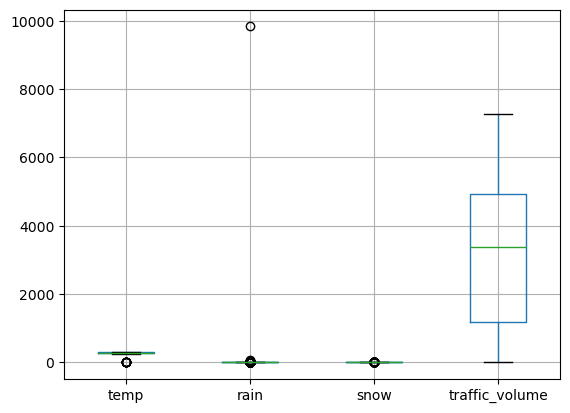

In [9]:
# visualization
data.boxplot()

In [10]:
# splitting the date column into year, month, day
data = pd.read_csv(r"C:\Users\chman\OneDrive\Desktop\TrafficVolumeProject\IBM\traffic volume.csv")
data[['day', 'month', 'year']] = data['date'].str.split('-', expand=True)

In [11]:
data[["hours","minutes","seconds"]] = data["Time"].str.split(":", expand = True)

In [12]:
data.drop(columns=['date', 'Time'], axis=1, inplace=True)

In [13]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,NaN,288.28,0.0,0.0,Clouds,5545,02,10,2012,09,00,00
1,NaN,289.36,0.0,0.0,Clouds,4516,02,10,2012,10,00,00
2,NaN,289.58,0.0,0.0,Clouds,4767,02,10,2012,11,00,00
3,NaN,290.13,0.0,0.0,Clouds,5026,02,10,2012,12,00,00
4,NaN,291.14,0.0,0.0,Clouds,4918,02,10,2012,13,00,00


In [14]:
y = data['traffic_volume']  # Dependent variable (target)
x = data.drop(columns=['traffic_volume'], axis=1)  # Independent variables (features)

In [15]:
from sklearn.preprocessing import scale

In [16]:
names = x.columns

In [17]:
for col in x.columns:
    if not pd.api.types.is_numeric_dtype(x[col]):
        x[col] = x[col].astype(str)  # Ensure it's string
        x[col] = x[col].astype('category').cat.codes  # Convert to numeric codes

In [18]:
x_scaled = scale(x)

In [19]:
x = pd.DataFrame(x_scaled, columns=names)

In [20]:
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.031687,0.530193,-0.007463,-0.027232,-0.567564,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.031687,0.611131,-0.007463,-0.027232,-0.567564,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.031687,0.627618,-0.007463,-0.027232,-0.567564,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.031687,0.668837,-0.007463,-0.027232,-0.567564,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.031687,0.744529,-0.007463,-0.027232,-0.567564,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


In [26]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =0)

In [30]:
import pickle
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(x_train)

pickle.dump(scale, open("scale.pkl", "wb"))

In [32]:
# Training and Testing the Model
# Initialize the model
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [34]:
lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
x_train = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)

In [38]:
# Fit the models with x_train and y_train
lin_reg.fit(x_train, y_train)
Dtree.fit(x_train, y_train)
Rand.fit(x_train, y_train)
svr.fit(x_train, y_train)
XGB.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [39]:
# Predict the y_train values and calculate the accuracy
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

In [40]:
# Model Evaluation
from sklearn import metrics

In [41]:
print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))

-5.5014650307416195
1.0
0.9746747939016401
-12.204587054900315
0.8486046195030212


In [42]:
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

In [43]:
print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))

-5.5014650307416195
1.0
0.9746747939016401
-12.204587054900315
0.8486046195030212


In [44]:
# Root Mean Square Error
p3 = Rand.predict(x_test)
MSE = metrics.mean_squared_error(p3,y_test)

In [45]:
np.sqrt(MSE)

799.2722311273561

In [46]:
# Save the Model
import pickle

In [47]:
pickle.dump(Rand,open("model.pkl",'wb'))

In [48]:
print("Model saved successfully as model.pkl")

Model saved successfully as model.pkl
